In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_results.csv")

In [3]:
grouped = df.groupby('draft_model')

In [4]:
avg = grouped.mean()[['latency', 'tar']].reset_index()

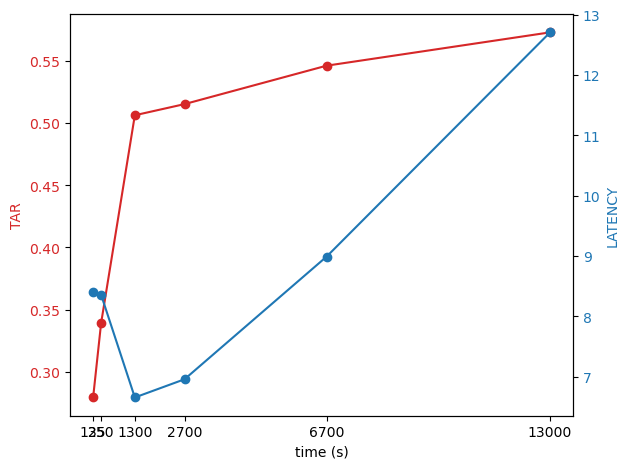

In [37]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('TAR', color=color)
ax1.plot(avg['draft_model'], avg['tar'], color=color)
ax1.scatter(avg['draft_model'], avg['tar'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
_ = ax1.set_xticks(df.draft_model.unique())
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('LATENCY', color=color)  # we already handled the x-label with ax1
ax2.plot(avg['draft_model'], avg['latency'], color=color)
ax2.scatter(avg['draft_model'], avg['latency'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 1000x300 with 0 Axes>

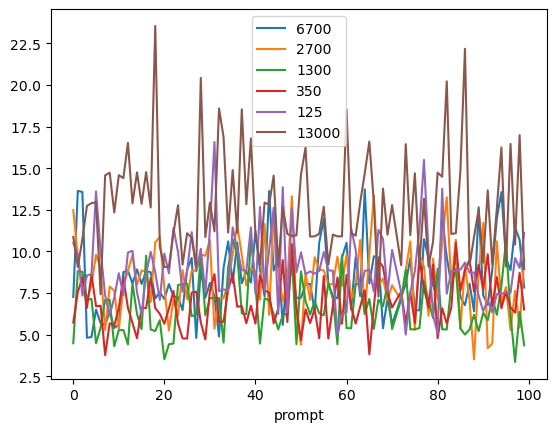

<Figure size 1000x300 with 0 Axes>

In [46]:
ax = plt.subplot(111)

df.groupby('draft_model').plot(x='prompt', y='latency', ax=ax)
L = plt.legend()
_ = [plt.setp(item, 'text', T) for item, T in zip(L.texts, df.draft_model.unique())]
plt.figure(figsize=(10,3))

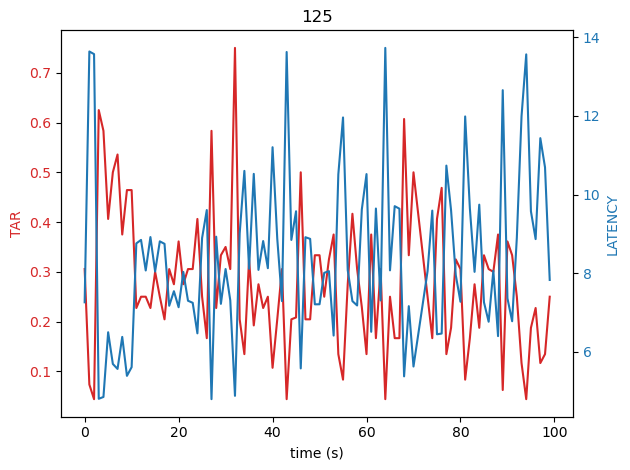

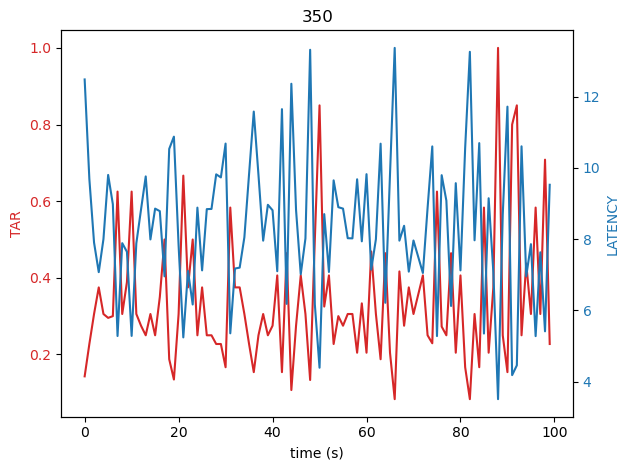

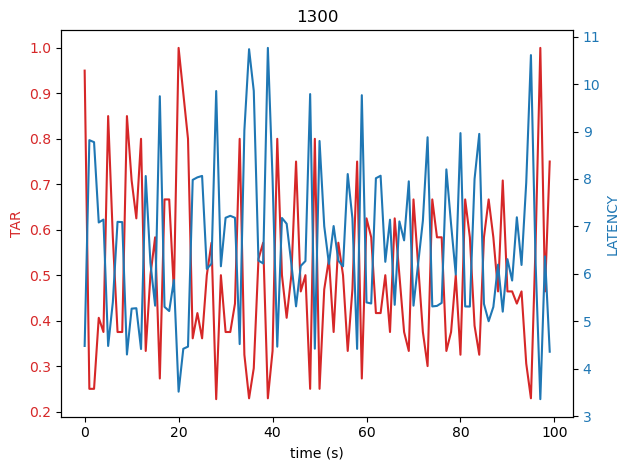

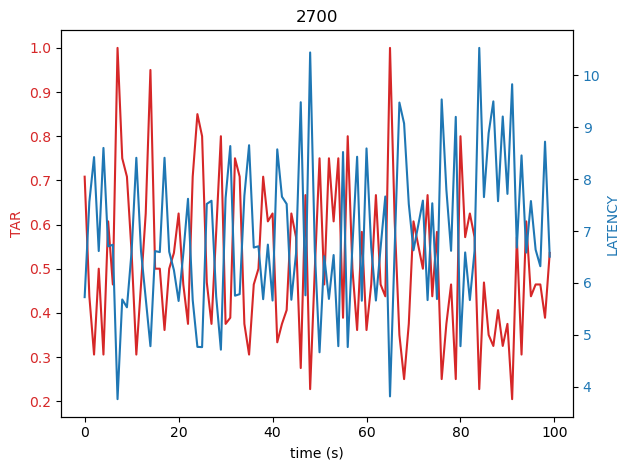

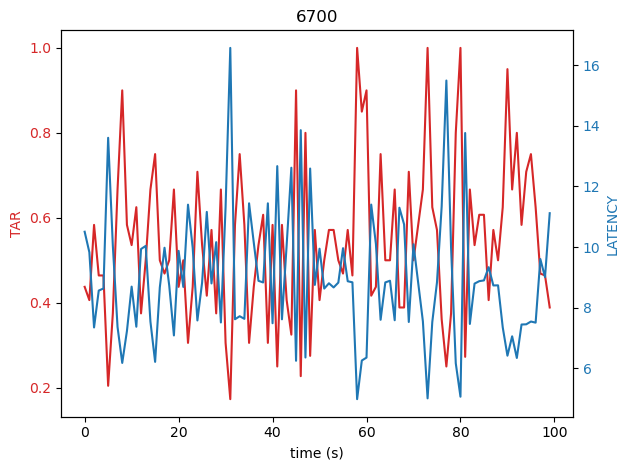

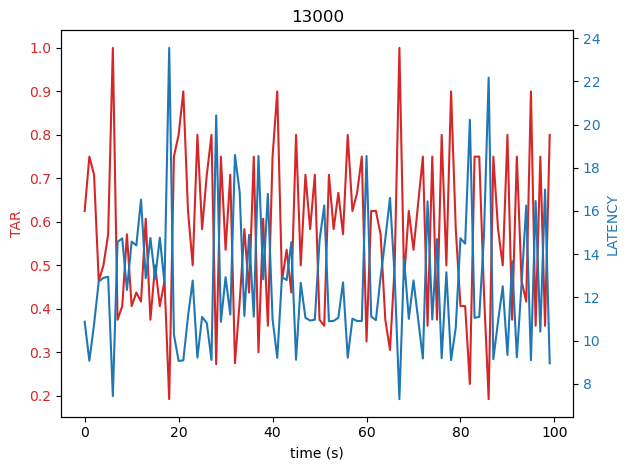

In [39]:
for name, group in grouped:

  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_title(name)
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel('TAR', color=color)
  ax1.plot(group['prompt'], group['tar'], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('LATENCY', color=color)  # we already handled the x-label with ax1
  ax2.plot(group['prompt'], group['latency'], color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()


In [ ]:
for name, group in grouped:
  plt.figure(figsize=(30, 10))
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel('TAR', color=color)
  ax1.plot(group['prompt'], -1 * group['tar'], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('LATENCY', color=color)  # we already handled the x-label with ax1
  ax2.plot(group['prompt'], group['latency'], color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()
